In [1]:
#Initial Imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


In [2]:
#Read the Index_DJIA.csv data files
Index_DJIA_csv = Path("Resources/Index_DJIA.csv")
Index_DJIA =pd.read_csv(Index_DJIA_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
Index_DJIA = Index_DJIA.rename(columns={"Close":"Index_DJIA"})
Index_DJIA = Index_DJIA[["Index_DJIA"]]
Index_DJIA


,Index_DJIA
Date,
2021-10-12,"34,378.34"
2021-10-11,"34,496.06"
2021-10-08,"34,746.25"
2021-10-07,"34,754.94"
2021-10-06,"34,416.99"
...,...
2020-10-16,"28,606.31"
2020-10-15,"28,494.20"
2020-10-14,"28,514.00"


In [3]:
#Count Nulls
print(Index_DJIA.isnull().sum())
print(Index_DJIA[Index_DJIA.isnull().any(axis = 1)])


Index_DJIA    0
dtype: int64
Empty DataFrame
Columns: [Index_DJIA]
Index: []


In [4]:
#Drop nulls
Index_DJIA.dropna(inplace=True)


In [5]:
#Read the Index_QQQM.csv data files
Index_QQQM_csv = Path("Resources/Index_QQQM.csv")
Index_QQQM =pd.read_csv(Index_QQQM_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
Index_QQQM = Index_QQQM.rename(columns={"Close":"Index_QQQM"})
Index_QQQM = Index_QQQM[["Index_QQQM"]]
Index_QQQM

,Index_QQQM
Date,
2020-10-13,121.050003
2020-10-14,119.970001
2020-10-15,119.107002
2020-10-16,118.500000
2020-10-19,116.449997
...,...
2021-10-06,147.880005
2021-10-07,149.179993
2021-10-08,148.449997


In [6]:
#Count Nulls
print(Index_QQQM.isnull().sum())
print(Index_QQQM[Index_QQQM.isnull().any(axis = 1)])


Index_QQQM    0
dtype: int64
Empty DataFrame
Columns: [Index_QQQM]
Index: []


In [7]:
#Drop nulls
Index_QQQM.dropna(inplace=True)


In [8]:
#Read the Index_S&P_SPX.csv data files
SPX_csv = Path("Resources/SPX.csv")
SPX =pd.read_csv(SPX_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
SPX = SPX.rename(columns={"Close":"SPX"})
SPX = SPX[["SPX"]]
SPX

,SPX
Date,
2021-10-12,"4,350.65"
2021-10-11,"4,361.19"
2021-10-08,"4,391.34"
2021-10-07,"4,399.76"
2021-10-06,"4,363.55"
...,...
2020-10-16,"3,483.81"
2020-10-15,"3,483.34"
2020-10-14,"3,488.67"


In [9]:
#Count Nulls
print(SPX.isnull().sum())
print(SPX[SPX.isnull().any(axis = 1)])

SPX    0
dtype: int64
Empty DataFrame
Columns: [SPX]
Index: []


In [10]:
#Drop nulls
SPX.dropna(inplace=True)


In [11]:
# Join Index_DJIA, Index_QQQM, SPX into a single Data Frame
df_daily = pd.concat([Index_DJIA, Index_QQQM, SPX], axis = "columns", join = "inner")


In [12]:
type(df_daily["Index_DJIA"].iloc[0])

str

In [13]:
df_daily.head()

,Index_DJIA,Index_QQQM,SPX
Date,,,
2021-10-12,"34,378.34",146.820007,"4,350.65"
2021-10-11,"34,496.06",147.320007,"4,361.19"
2021-10-08,"34,746.25",148.449997,"4,391.34"
2021-10-07,"34,754.94",149.179993,"4,399.76"
2021-10-06,"34,416.99",147.880005,"4,363.55"


In [14]:
df_daily = df_daily.replace({',':''},regex=True).apply(pd.to_numeric,1)

In [15]:
df_daily_returns = df_daily.pct_change()
df_daily_returns = df_daily_returns.dropna().copy()
df_daily_returns

,Index_DJIA,Index_QQQM,SPX
Date,,,
2021-10-11,0.003424,0.003406,0.002423
2021-10-08,0.007253,0.007670,0.006913
2021-10-07,0.000250,0.004917,0.001917
2021-10-06,-0.009724,-0.008714,-0.008230
2021-10-05,-0.002973,-0.006762,-0.004086
...,...,...,...
2020-10-19,-0.004005,-0.003764,-0.004705
2020-10-16,0.014573,0.017604,0.016601
2020-10-15,-0.003919,0.005122,-0.000135


<AxesSubplot:xlabel='Date'>

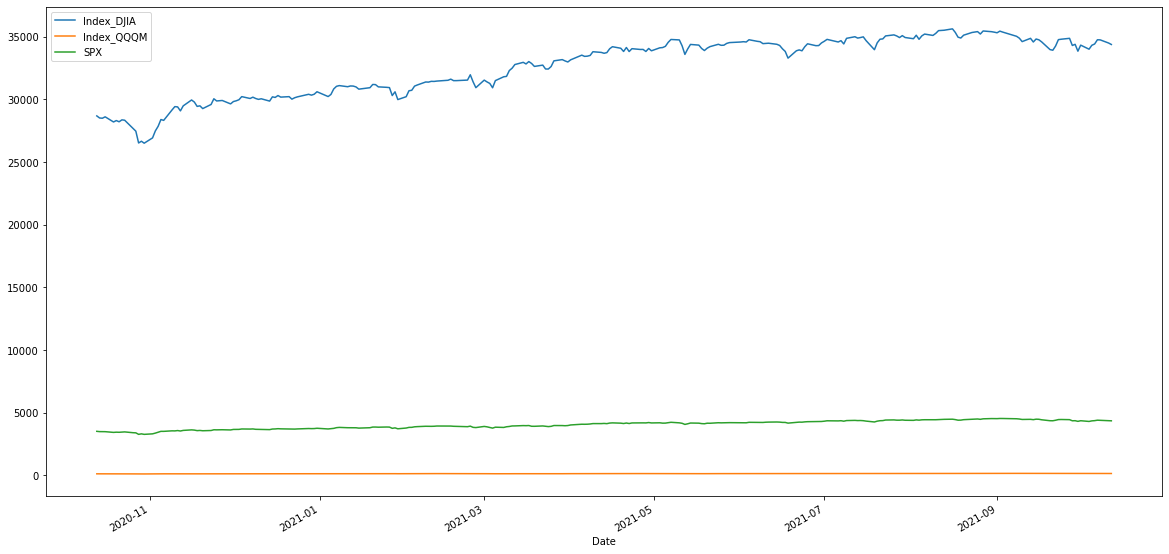

In [16]:
# PLot daily returns of all portfolios
df_daily.plot(figsize = (20,10))


In [17]:
df_cum = (1+ df_daily_returns).cumprod()

df_cum.replace([np.inf,-np.inf],np.nan,inplace=True)
df_cum = df_cum.dropna().copy()
df_cum


,Index_DJIA,Index_QQQM,SPX
Date,,,
2021-10-11,1.003424,1.003406,1.002423
2021-10-08,1.010702,1.011102,1.009353
2021-10-07,1.010955,1.016074,1.011288
2021-10-06,1.001124,1.007220,1.002965
2021-10-05,0.998148,1.000409,0.998867
...,...,...,...
2020-10-19,0.820151,0.793148,0.787680
2020-10-16,0.832103,0.807111,0.800756
2020-10-15,0.828842,0.811245,0.800648


<AxesSubplot:xlabel='Date'>

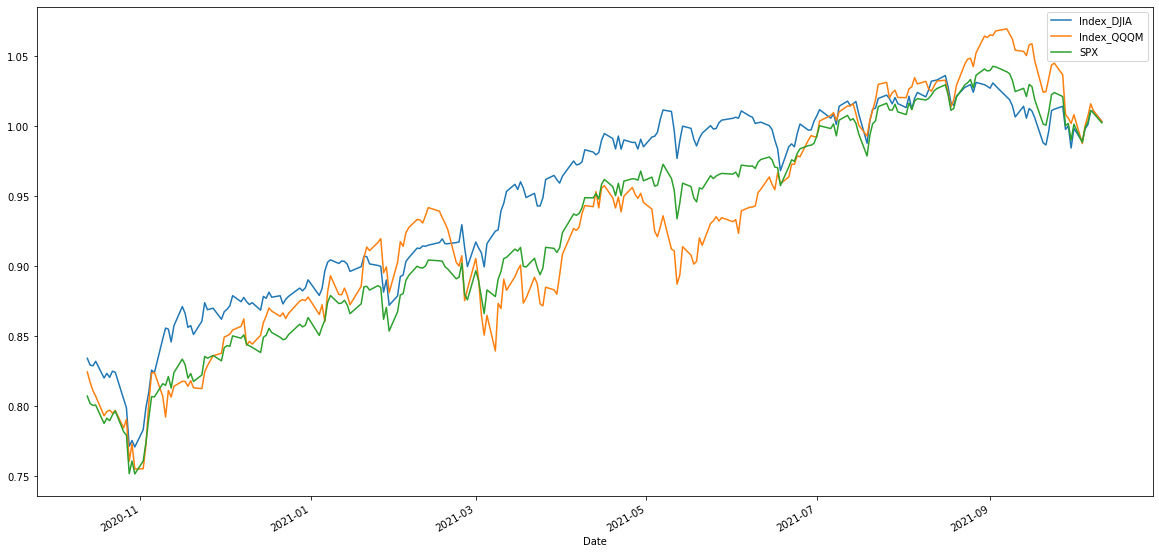

In [18]:
# Plot cumulative returns
df_cum.plot(figsize = (20,10))

 <AxesSubplot:xlabel='Date'>


<AxesSubplot:>

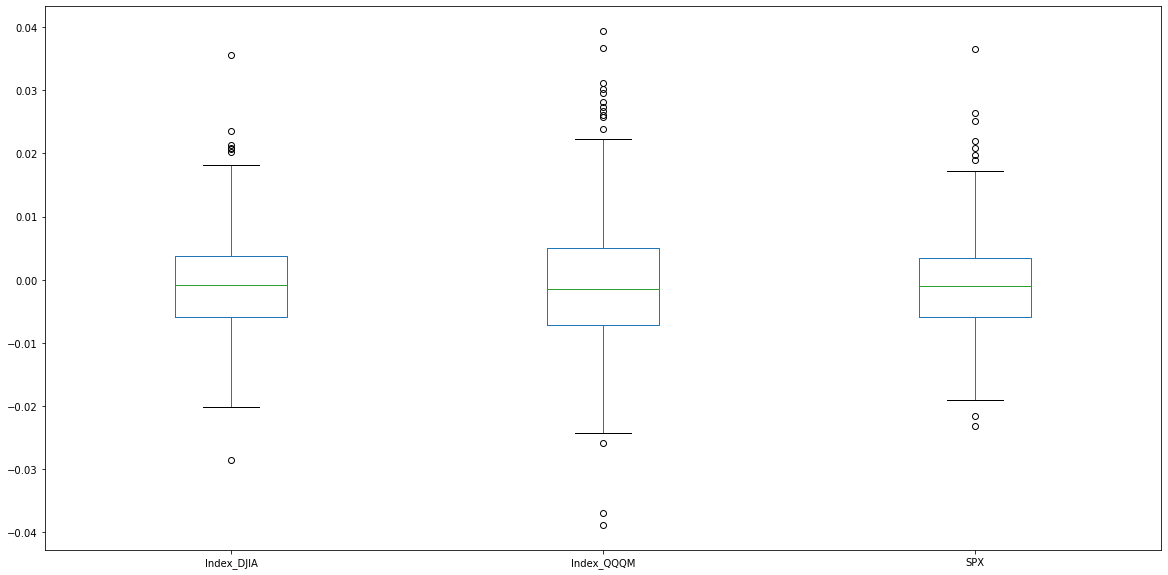

In [19]:
# Box plot to visually show risk
df_daily_returns.plot(kind = "box", figsize = (20,10))

In [20]:
# Calculate the standard deviation of all stocks
#df_daily_std = pd.DataFrame(df_daily.std()).rename(columns - [0:"std"})
df_daily_returns.std()

Index_DJIA    0.008390
Index_QQQM    0.011671
SPX           0.008539
dtype: float64

In [21]:
# Calculate the Annualized Std Deviation (252 trading days)
df_annualized_std = df_daily_returns.std()*np.sqrt(252)
df_annualized_std


Index_DJIA    0.133180
Index_QQQM    0.185273
SPX           0.135555
dtype: float64